In [1]:
import sys
parent_dir = '/'.join(str(globals()['_dh'][0]).split('/')[:-1])
sys.path.append(parent_dir)

import cv2
from image_processing import affine_transformation, display_image, crop_patches, filter_patches, histogram_equalizing, compare_affine_transformation

In [2]:
n = 3
file1 = "./example_data/images/110.jpeg"
file2 = "./example_data/images/111.jpeg"
img1 = cv2.imread(file1, cv2.IMREAD_UNCHANGED)
img2 = cv2.imread(file2, cv2.IMREAD_UNCHANGED)
new_img = affine_transformation(img1, img2, knn_neighbors=n, display_keypoints=False)

compare_affine_transformation(img1, img2, new_img)

Before affine transformation: 90.53386306762695
After affine transformation: 73.07655715942383
After affine transformation and crop: 72.92659379337695


In [3]:
file1 = "./example_data/images/10_bez_crop.jpg"
file2 = "./example_data/images/10_1_crop.jpg"

input1 = cv2.imread(file1, cv2.IMREAD_UNCHANGED)
input2 = cv2.imread(file2, cv2.IMREAD_UNCHANGED)

input1, input2 = histogram_equalizing(input1, input2)
resized1 = cv2.resize(input1, (512 * 5, 512 * 5), interpolation=cv2.INTER_AREA)
resized2 = cv2.resize(input2, (512 * 5, 512 * 5), interpolation=cv2.INTER_AREA)
resized1 = affine_transformation(resized1, resized2, knn_neighbors=10, display_keypoints=False)

compare_affine_transformation(
        cv2.resize(input1, (512 * 5, 512 * 5), interpolation=cv2.INTER_AREA),
        resized2, 
        resized1
        )

mask = [[0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0]]
patches1 = filter_patches(crop_patches(resized1, 512), mask) 
patches2 = filter_patches(crop_patches(resized2, 512), mask) 

equalized_patch_pairs = [histogram_equalizing(patch1, patch2) for patch1, patch2 in zip(patches1, patches2)]

Before affine transformation: 61.61635837554932
After affine transformation: 54.46350696563721
After affine transformation and crop: 55.159696586893176


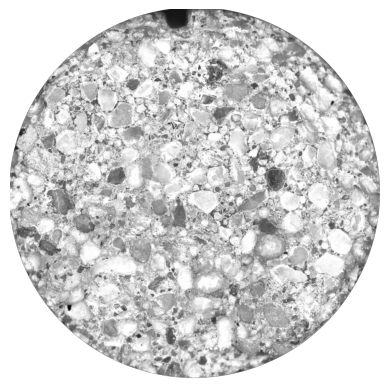

In [4]:
display_image(resized1)

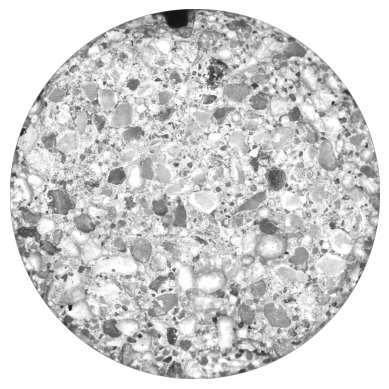

In [5]:
display_image(resized2)

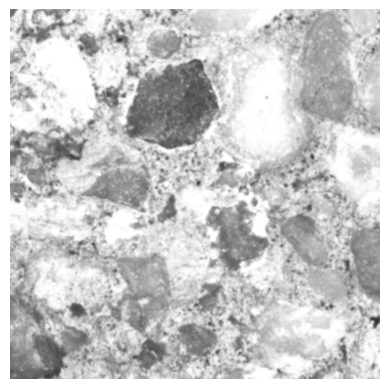

In [6]:
display_image(equalized_patch_pairs[9][0])

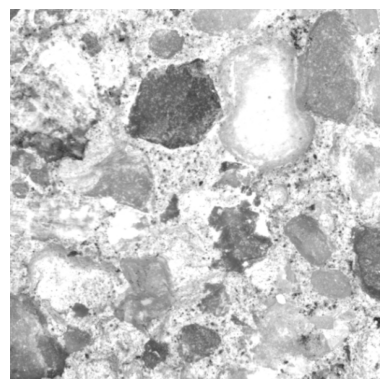

In [7]:
display_image(equalized_patch_pairs[9][1])